In [58]:
# project 1 - 당뇨병 수치 맞추기
#1-1. 데이터 가져오기 - 파이썬에서 제공하는 사이킷런에서 당뇨병 환자 데이터를 가져옵니다.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


from sklearn.datasets import load_diabetes
diabetes=load_diabetes()

In [59]:
#1-2. 이후 diabetes의 data와 target을 할당해주겠습니다.

df_x = diabetes.data
df_y = diabetes.target


#2~3. 모델에 입력할 x값과, 모델이 예측할 y값을 모두 numpy array로 변환합니다.
# 이미 두 데이터가 numpy array 형태를 띄므로, 별도의 처리 없이 바로 train - test 데이터 할당으로 넘어갑니다.
#df_x
#df_y

In [60]:
#4. train data와 test data로 분류합니다.

X = df_x
y = df_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [61]:
#5-1 모델 준비하기 : 입력 데이터 갯수에 맞는 W, b가중치를 구하고, 모델 함수 구현하기
#먼저 함수의 기본 틀을 만들어줍니다.

def model(X, W, b):
    predictions = 150
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

#구하고자 하는 가중치를 랜덤으로 설정합니다.
W = np.random.rand(10) #열의 갯수가 10개 이므로 랜덤으로 받는 데이터 역시 10개로 설정합니다.
b = np.random.rand()

#랜덤한 값으로 가중치가 담겼는지 살펴봅니다. 0~1 사이의 랜덤한 값이 잘 배정되었음을 확인할 수 있습니다.
#W
b

0.6718245511791023

In [62]:
#6 손실함수 loss 정의하기
#손실함수를 MSE 함수로 정의해주세요.

def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [63]:
#7 기울기를 구하는 gradient함수 구하기

def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db


dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [-1.36992061 -0.31079186 -4.28765636 -3.2242271  -1.5418909  -1.26468608
  2.88683355 -3.14239103 -4.13423486 -2.79171035]
db: -2.923319223433642


Iteration 10 : Loss 5755.8615
Iteration 20 : Loss 5681.1718
Iteration 30 : Loss 5608.9623
Iteration 40 : Loss 5539.0921
Iteration 50 : Loss 5471.4788
Iteration 60 : Loss 5406.0437
Iteration 70 : Loss 5342.7110
Iteration 80 : Loss 5281.4076
Iteration 90 : Loss 5222.0628
Iteration 100 : Loss 5164.6085
Iteration 110 : Loss 5108.9792
Iteration 120 : Loss 5055.1115
Iteration 130 : Loss 5002.9444
Iteration 140 : Loss 4952.4190
Iteration 150 : Loss 4903.4785
Iteration 160 : Loss 4856.0681
Iteration 170 : Loss 4810.1350
Iteration 180 : Loss 4765.6283
Iteration 190 : Loss 4722.4988
Iteration 200 : Loss 4680.6990
Iteration 210 : Loss 4640.1834
Iteration 220 : Loss 4600.9077
Iteration 230 : Loss 4562.8295
Iteration 240 : Loss 4525.9077
Iteration 250 : Loss 4490.1027
Iteration 260 : Loss 4455.3765
Iteration 270 : Loss 4421.6920
Iteration 280 : Loss 4389.0140
Iteration 290 : Loss 4357.3080
Iteration 300 : Loss 4326.5411
Iteration 310 : Loss 4296.6813
Iteration 320 : Loss 4267.6980
Iteration 330 : L

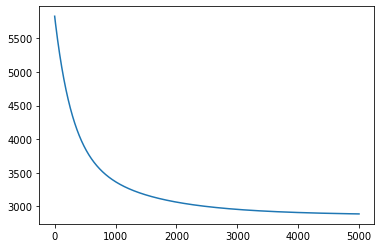

[  16.96448785 -182.13385289  479.52644005  302.66706007  -37.20072753
  -98.99988315 -212.71759201  142.97443606  388.08386392   93.47076559] 2.0644362565064243


In [64]:
#8 하이퍼 파라미터인 학습률 설정하기
#학습률, learning rate 를 설정해주세요
#만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

#먼저, 학습률을 설정해 줍니다. 학습률은 0~1사이의 실수로 설정합니다.

LEARNING_RATE = 0.1

#9 모델 학습하기
#정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
#loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
#입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

losses = []

for i in range(1, 5001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        

        
plt.plot(losses)
plt.show()

print(W, b)

In [65]:
#10 테스트 데이터 성능 확인하기
print(W, b)

prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse


[  16.96448785 -182.13385289  479.52644005  302.66706007  -37.20072753
  -98.99988315 -212.71759201  142.97443606  388.08386392   93.47076559] 2.0644362565064243


2992.845680486457

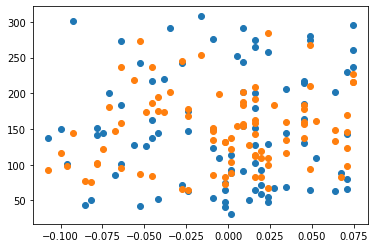

In [66]:
#11 정답 데이터와 예측 데이터 시각화하기
#x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

In [67]:
# project2 - 자전거 타는 사람 예측하기(sklearn 이용)
#1. 데이터 가져오기
#터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
import seaborn as sns

train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [68]:
#2. datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성합니다.

train['datetime'] = pd.to_datetime(train['datetime'])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['min'] = train['datetime'].dt.minute
train['sec'] = train['datetime'].dt.second


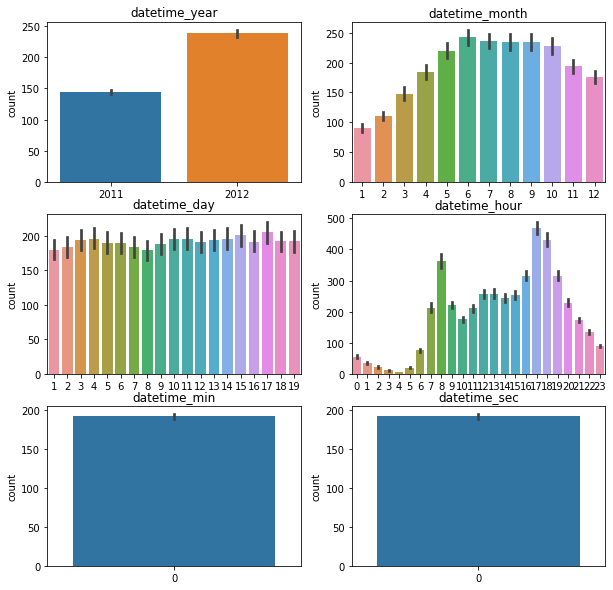

In [69]:
#3. year, month, day, hour, minute, second 데이터 개수 시각화하기
#sns.countplot 활용해서 시각화하고, subplot을 활용해서 한 번에 6개의 그래프 함께 시각화합니다.

plt.figure(figsize=(10, 10))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.
 
plt.subplot(321)
sns.barplot(data=train, x='year',y='count').set_xlabel('') 
plt.title("datetime_year")

plt.subplot(322)
sns.barplot(data=train, x='month',y='count').set_xlabel('')
plt.title("datetime_month")

plt.subplot(323)
sns.barplot(data=train, x='day',y='count').set_xlabel('')
plt.title("datetime_day")

plt.subplot(324)
sns.barplot(data=train, x='hour',y='count').set_xlabel('')
plt.title("datetime_hour")

plt.subplot(325)
sns.barplot(data=train, x='min',y='count').set_xlabel('')
plt.title("datetime_min")

plt.subplot(326)
sns.barplot(data=train, x='sec',y='count').set_xlabel('')
plt.title("datetime_sec")

plt.show()

In [70]:
#4. X, y 컬럼 선택 및 train/test 데이터 분리
# X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 
#만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다.
#ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?
#count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기


features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'windspeed','year','month', 'day','hour'] 
target = 'count'
X = train[features] 
y = train[target]


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)  

print(X_train.shape, y_train.shape) 
print(X_test.shape, y_test.shape)


(8708, 12) (8708,)
(2178, 12) (2178,)


In [72]:
#5. LinearRegression 모델 학습
#sklearn의 LinearRegression 모델 불러오기 및 학습하기
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# 모델 학습은 다음과 같이 입력 데이터에 해당하는 X_train과 정답 데이터에 해당하는 y_train을 넣는다.
model.fit(X_train, y_train) 

model

LinearRegression()

In [73]:
#6. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
#학습된 모델에 X_test를 입력해서 예측값 출력하고, 모델이 예측한 값과 정답 target 간의 손실함수 값을 계산합니다.
#mse 값과 함께 rmse 값도 계산합니다.

# 예측값 출력 
predictions = model.predict(X_test) 
predictions


array([341.44956853, 260.06847667, 157.04342278, ..., 387.73535639,
       208.48543962, 262.09788849])

In [74]:
# 손실함수값 계산하기 
from sklearn.metrics import mean_squared_error  
mse = mean_squared_error(y_test, predictions) 
mse
def RMSE(a, b): 
    mse = ((a - b) ** 2).mean() # 두 값의 차이의 제곱의 평균 
    rmse = mse ** 0.5 # MSE의 제곱근 
    return rmse 



In [75]:
#rmse 값 출력 
rmse = RMSE(y_test, predictions)

print(rmse)

139.54432866525576


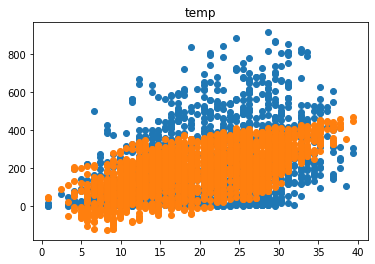

In [76]:
#7. x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
#x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화합니다.
#x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화합니다.

#temp
plt.title('temp') 
plt.scatter(X_test.iloc[:,4], y_test) 
plt.scatter(X_test.iloc[:,4], predictions)


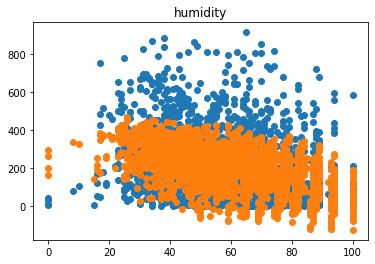

In [57]:
# humidity 
plt.title('humidity') 
plt.scatter(X_test.iloc[:,6], y_test) 
plt.scatter(X_test.iloc[:,6], predictions)
